## 카테고리데이터의 처리
[category encoding 설명](https://dailyheumsi.tistory.com/120)

### One-Hot Encoding (`pd.get_dummies`)
- ex) Data 집합 : {Green, Blue, Yellow}  
인덱스 Green : 0, Blue : 1, Yellow : 2

In [2]:
import pandas as pd
import numpy as np

In [4]:
a = pd.DataFrame({'source' : [0,1,2],
                    'target' : [2,2,3],
                    'weight' : [3,4,5],
                    'color' : ['red','blue','green']})
a

,source,target,weight,color
0,0,2,3,red
1,1,2,4,blue
2,2,3,5,green


In [5]:
pd.get_dummies(a)

,source,target,weight,color_blue,color_green,color_red
0,0,2,3,0,0,1
1,1,2,4,1,0,0
2,2,3,5,0,1,0


- column명 탈락

In [12]:
pd.get_dummies(a['color'])

,blue,green,red
0,0,0,1
1,1,0,0
2,0,1,0


- column명 포함

In [13]:
pd.get_dummies(a[['color']])

,color_blue,color_green,color_red
0,0,0,1
1,1,0,0
2,0,1,0


> 위 방식보다 아래가 좀 더 일반적

In [7]:
pd.concat([a, pd.get_dummies(a['color'])], axis=1)

,source,target,weight,color,blue,green,red
0,0,2,3,red,0,0,1
1,1,2,4,blue,1,0,0
2,2,3,5,green,0,1,0


In [14]:
pd.merge(a, pd.get_dummies(a[['color']]), left_index=True, right_index=True)

,source,target,weight,color,color_blue,color_green,color_red
0,0,2,3,red,0,0,1
1,1,2,4,blue,1,0,0
2,2,3,5,green,0,1,0


### 숫자로 표현된 categoric data 예시

In [15]:
w = {3 : "M", 4:"L", 5:"XL"}
a["weight_sign"] = a["weight"].map(w)
a

,source,target,weight,color,weight_sign
0,0,2,3,red,M
1,1,2,4,blue,L
2,2,3,5,green,XL


In [17]:
pd.get_dummies(a).values

array([[0, 2, 3, 0, 0, 1, 0, 1, 0],
       [1, 2, 4, 1, 0, 0, 1, 0, 0],
       [2, 3, 5, 0, 1, 0, 0, 0, 1]])

## numeric categoric 데이터 나누기
- 구갈 길이를 동일하게 나누기
- data의 출연 횟수를 동일하게 나누기

In [3]:
raw = {'regiment' : ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 
'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scounts','Scounts','Scounts','Scounts'],
'company' : ['1st','1st','2nd','2nd','1st','1st','2nd','2nd','1st','1st','2nd','2nd'],
'name' : ["Miller", "Jacobson","Ali",'Miner','Cooze','Jacon','Ryaner','Sone','Sloan','Piger','Riani','Ali'],
'preTestScore':[4,24,31,2,3,4,24,31,2,3,2,3],
'postTestScore' : [25,94,57,62,70,25,94,57,62,80,62,70]}
df = pd.DataFrame(raw, columns=['regiment','company','name','preTestScore','postTestScore'])
df

,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Miner,2,62
4,Dragoons,1st,Cooze,3,70
5,Dragoons,1st,Jacon,4,25
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57
8,Scounts,1st,Sloan,2,62
9,Scounts,1st,Piger,3,80


<AxesSubplot:>

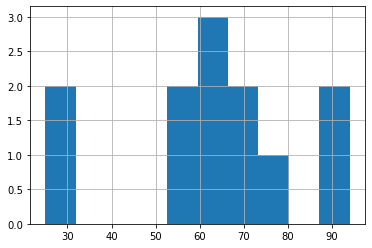

In [6]:
df.postTestScore.hist()

In [8]:
# 구간기준, data binning 0~50,50~80, 80~100
bins = [0,50,80,100]

# 구간명
group_names = ["Low",'Good','Great']

# cut후 categories에 할당
categories = pd.cut(df['postTestScore'], bins, labels=group_names)
df['categories'] = pd.cut(df['postTestScore'], bins, labels = group_names)
categories

0       Low
1     Great
2      Good
3      Good
4      Good
5       Low
6     Great
7      Good
8      Good
9      Good
10     Good
11     Good
Name: postTestScore, dtype: category
Categories (3, object): ['Low' < 'Good' < 'Great']

In [13]:
pd.get_dummies(df,columns=['categories'])

,regiment,company,name,preTestScore,postTestScore,categories_Low,categories_Good,categories_Great
0,Nighthawks,1st,Miller,4,25,1,0,0
1,Nighthawks,1st,Jacobson,24,94,0,0,1
2,Nighthawks,2nd,Ali,31,57,0,1,0
3,Nighthawks,2nd,Miner,2,62,0,1,0
4,Dragoons,1st,Cooze,3,70,0,1,0
5,Dragoons,1st,Jacon,4,25,1,0,0
6,Dragoons,2nd,Ryaner,24,94,0,0,1
7,Dragoons,2nd,Sone,31,57,0,1,0
8,Scounts,1st,Sloan,2,62,0,1,0
9,Scounts,1st,Piger,3,80,0,1,0


## Label encoding by sklearn

- Scikit-learn의 preprocessing 패키지도 label, one-hot 지원
- (문자를 숫자로 사용 가능 !)  
⛔ fit과 transform의 과정이 나누어진 이유
- 새로운 data 입력시 기존 labelling 규칙을 그대로 적용할 필요가 있음
- fit은 규칙을 생성하는 과정
- Transform은 규칙을 적용하는 과정
  - Fit을 통해 규칙이 생성된 labelencoder는 따로 저장하여 새로운 데이터를 입력할 경우
  - Encoder들을 실제 시스템에 사용할 경우


In [14]:
# pandas data를 numpy data로 변형
raw_example = df.values
raw_example[:3]

array([['Nighthawks', '1st', 'Miller', 4, 25, 'Low'],
       ['Nighthawks', '1st', 'Jacobson', 24, 94, 'Great'],
       ['Nighthawks', '2nd', 'Ali', 31, 57, 'Good']], dtype=object)

In [15]:
# 원본데이터를 훼손하지 않기 위해 copy
copy_data = raw_example.copy()
copy_data

array([['Nighthawks', '1st', 'Miller', 4, 25, 'Low'],
       ['Nighthawks', '1st', 'Jacobson', 24, 94, 'Great'],
       ['Nighthawks', '2nd', 'Ali', 31, 57, 'Good'],
       ['Nighthawks', '2nd', 'Miner', 2, 62, 'Good'],
       ['Dragoons', '1st', 'Cooze', 3, 70, 'Good'],
       ['Dragoons', '1st', 'Jacon', 4, 25, 'Low'],
       ['Dragoons', '2nd', 'Ryaner', 24, 94, 'Great'],
       ['Dragoons', '2nd', 'Sone', 31, 57, 'Good'],
       ['Scounts', '1st', 'Sloan', 2, 62, 'Good'],
       ['Scounts', '1st', 'Piger', 3, 80, 'Good'],
       ['Scounts', '2nd', 'Riani', 2, 62, 'Good'],
       ['Scounts', '2nd', 'Ali', 3, 70, 'Good']], dtype=object)

In [16]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [17]:
# regiment
raw_example[:,0]

array(['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons',
       'Dragoons', 'Dragoons', 'Dragoons', 'Scounts', 'Scounts',
       'Scounts', 'Scounts'], dtype=object)

In [18]:
le.fit(raw_example[:,0])

LabelEncoder()

In [19]:
le.classes_ # 0, 1, 2 번호가 매겨져있음

array(['Dragoons', 'Nighthawks', 'Scounts'], dtype=object)

In [20]:
le.transform(raw_example[:,0])

array([1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2])

In [25]:
copy_data[:, 0] = le.transform(raw_example[:,0])
copy_data[:,0]

array([1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2], dtype=object)

### LabelEncoder 사용 예시

In [27]:
label_column = [0,1,2,5]
label_encoder_list = []

for column_index in label_column:
    # encoder 생성
    le = preprocessing.LabelEncoder()
    # Data에 맞게 encoding fit
    le.fit(raw_example[:,column_index])
    # 실제 데이터 => labelling data
    copy_data[:,column_index] = le.transform(raw_example[:,column_index])
    label_encoder_list.append(le)
    del le


array([[1, 0, 4, 4, 25, 2],
       [1, 0, 2, 24, 94, 1],
       [1, 1, 0, 31, 57, 0],
       [1, 1, 5, 2, 62, 0],
       [0, 0, 1, 3, 70, 0],
       [0, 0, 3, 4, 25, 2],
       [0, 1, 8, 24, 94, 1],
       [0, 1, 10, 31, 57, 0],
       [2, 0, 9, 2, 62, 0],
       [2, 0, 6, 3, 80, 0],
       [2, 1, 7, 2, 62, 0],
       [2, 1, 0, 3, 70, 0]], dtype=object)

In [30]:
copy_data

array([[1, 0, 4, 4, 25, 2],
       [1, 0, 2, 24, 94, 1],
       [1, 1, 0, 31, 57, 0],
       [1, 1, 5, 2, 62, 0],
       [0, 0, 1, 3, 70, 0],
       [0, 0, 3, 4, 25, 2],
       [0, 1, 8, 24, 94, 1],
       [0, 1, 10, 31, 57, 0],
       [2, 0, 9, 2, 62, 0],
       [2, 0, 6, 3, 80, 0],
       [2, 1, 7, 2, 62, 0],
       [2, 1, 0, 3, 70, 0]], dtype=object)

In [31]:
label_encoder_list

[LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder()]

In [32]:
label_encoder_list[1].classes_

array(['1st', '2nd'], dtype=object)

> 데이터가 많으면 get_dummies 사용하기 어려움  
=> 그럴땐 onehotencoder사용하는 것이 더 편함

### One-hot encoding

In [33]:
import os

In [49]:
data_files = reversed([os.path.join('..', 'data', 'titanic', filename) for filename in os.listdir('../data/titanic')])
df_list = []
for filename in data_files:
    df_list.append(pd.read_csv(filename))
# 모판 만들기(한판으로)
df = pd.concat(df_list, sort = False)
# 중복되는 index발생 => reset_index로 처리
# 인덱스가 출력되지 않도록 : drop = True
df = df.reset_index(drop = True)

number_of_train = df.Survived.notnull().sum()
y = df.pop('Survived')[:number_of_train]
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
object_columns = ["PassengerId", "Pclass", "Name", "Sex", "Ticket", "Cabin", "Embarked"]
numeric_columns = ["Age","SibSp","Parch","Fare"]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [38]:
df.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [39]:
for col_name in object_columns:
    df[col_name] = df[col_name].astype(object)

for col_name in numeric_columns:
    df[col_name] = df[col_name].astype(float)

df["Parch"] = df["Parch"].astype(int)
df["SibSp"] = df["SibSp"].astype(int)

In [40]:
def merge_and_get(ldf, rdf, on, how = "inner", index = None):
    if index is True :
        return pd.merge(ldf, rdf, how = how, left_index = True, right_index = True)
    else:
        return pd.merge(ldf, rdf, how = how, on=on)

In [44]:
pd.get_dummies(df['Sex'], prefix = 'Sex')

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
1304,0,1
1305,1,0
1306,0,1
1307,0,1


In [45]:
one_hot_df = merge_and_get(
    df, pd.get_dummies(df['Sex'], prefix = 'Sex'), on =None, index=True) # sex_modified, index를 기준으로

one_hot_df = merge_and_get(
    one_hot_df, pd.get_dummies(df['Pclass'], prefix='Pclass'), on = None, index=True)

one_hot_df = merge_and_get(
    one_hot_df, pd.get_dummies(df['Embarked'], prefix='Embarked'), on = None, index=True)

In [55]:
one_hot_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,0,1,0,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,1,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0,1,0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,1,0,0,0,0,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,1,0,0,1,0,0,1
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0,1,0,0,1,0,0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,1,0,0,1,0,0,1
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,1,0,0,1,0,0,1


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

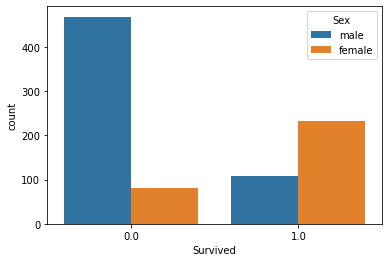

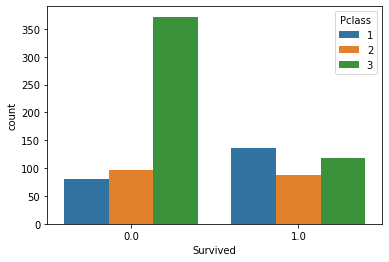

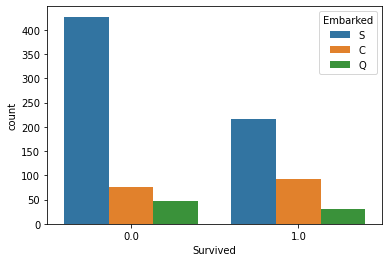

In [50]:
temp_columns = ['Sex','Pclass','Embarked']

for col_name in temp_columns:
    temp_df = pd.merge(one_hot_df[col_name], y, left_index=True, right_index=True)
    sns.countplot(x = 'Survived', hue=col_name, data=temp_df)
    plt.show()

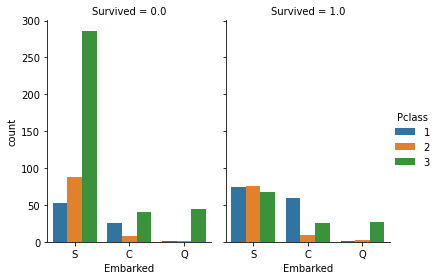

In [51]:
temp_df = pd.merge(one_hot_df[temp_columns], y, left_index=True, right_index=True)
g = sns.catplot(x = 'Embarked', hue = 'Pclass', col='Survived', 
                data = temp_df, kind = 'count', height=4, aspect=.7)

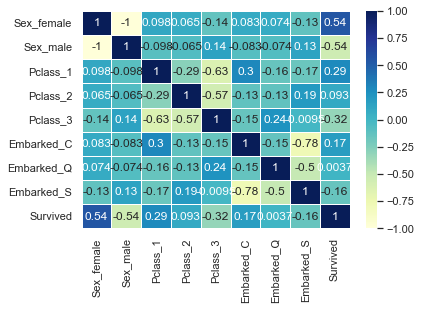

In [56]:
crosscheck_columns = [col_name for col_name in one_hot_df.columns.tolist()
                        if col_name.split("_")[0] in temp_columns and "_" in col_name]

# temp_columns
temp_df = pd.merge(one_hot_df[crosscheck_columns], y, left_index=True, right_index=True)

corr = temp_df.corr()
sns.set()
ax = sns.heatmap(corr, annot = True, linewidths = 0.5, cmap = "YlGnBu")